In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
# Load dataset
df = pd.read_csv('/kaggle/input/california-housing-prices/housing.csv')  # Adjust path if necessary

# Display first few rows
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Pre-processing data

In [6]:
# Check for missing values
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20640 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   ocean_proximity_INLAND      20640 non-null  bool   
 10  ocean_proximity_ISLAND      20640 non-null  bool   
 11  ocean_proximity_NEAR BAY    20640 non-null  bool   
 12  ocean_proximity_NEAR OCEAN  20640 non-null  bool   
dtypes: bool(4), float64(9)
memory u

In [5]:
# filling missing for type float64 column values
df['total_bedrooms'] = df['total_bedrooms'].median()

In [9]:
# convert string to flow
# print(df.select_dtypes(include=['object']).columns) # find all columns 
df = pd.get_dummies(df, drop_first=True)

In [11]:
# Define features (X) and target (y)
X = df.drop('median_house_value', axis=1)  # Features
y = df['median_house_value']  # Target


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Initialize the Gradient Boosting Regressor
gbm = GradientBoostingRegressor(
    n_estimators=100,    # Number of trees
    learning_rate=0.1,   # Step size for updating weights
    max_depth=3,         # Maximum depth of each tree
    random_state=42
)

# Train the model
gbm.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [14]:
# Predict on the test set
y_pred = gbm.predict(X_test)


In [15]:
# evalaute
# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# R-squared Score
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")


Mean Squared Error: 3169527887.54676
Mean Absolute Error: 38450.260879733534
R-squared Score: 0.7581268184073684


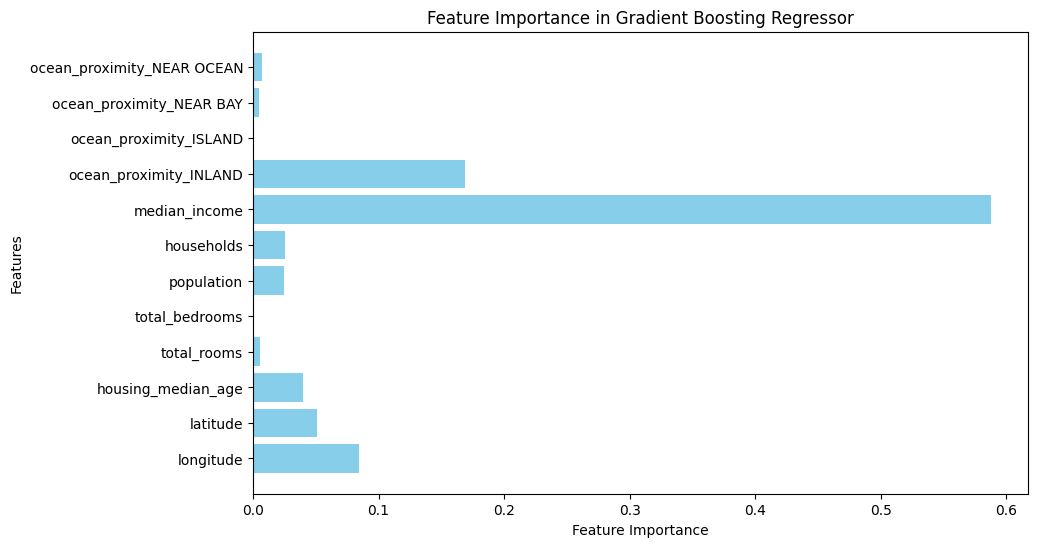

In [16]:
# visualvise feature importance
# Feature importance
feature_importances = gbm.feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Gradient Boosting Regressor')
plt.show()


In [ ]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best Parameters: {grid_search.best_params_}")


Fitting 3 folds for each of 243 candidates, totalling 729 fits


In [ ]:
# Summary of Steps
# Import libraries: Use essential libraries like sklearn, pandas, and matplotlib.
# Load dataset: Load the California Housing dataset from Kaggle.
# Preprocess data: Handle missing values and split the data into features and target.
# Split data: Divide the data into training and testing sets.
# Train GBM model: Use GradientBoostingRegressor with suitable hyperparameters.
# Evaluate model: Use metrics like MSE, MAE, and R² to assess model performance.
# Feature importance: Visualize which features impact predictions most.
# Optimize model: Use GridSearchCV to fine-tune hyperparameters (optional).